### Question – 3 (Using Python)

**4. Extract and list top 5 variable pairs that show positive correlation (if any) and top 5 variable pairs that show negative correlation (if any)**

***Answer***

The code below calculate the top 5 positive and top 5 negative correlations

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
################################################################################################################
# Read data
data = pd.read_csv("../data/question_3.csv")
################################################################################################################
# return flatten list for the lower triangle of the given matrix 
def flatten_matrix_lower_triangle(mtx_df):
    rows = np.array(mtx_df.index)
    columns = np.array(mtx_df.columns)
    flat_corr =[]
    for i in range(len(rows)):
        for j in range(len(columns)):
            if j >= i:
                break
            flat_corr.append((rows[i], columns[j], mtx_df.at[rows[i], columns[j]]))
    return flat_corr

    
# exclude Id
data = data.drop(columns=['Id'], axis=1)
# Pearson's correlation coefficients
correlations = data.corr()
# takes lower triangle of the correlations matrix 
lower_triangle_correlations = flatten_matrix_lower_triangle(correlations)
positive_correlations = [x for x in lower_triangle_correlations if x[2] > 0]
negative_correlations = [x for x in lower_triangle_correlations if x[2] < 0]
# sort the correlations
sorted_positive_correlations = sorted(positive_correlations, key=lambda x: x[2], reverse=True)
sorted_negative_correlations = sorted(negative_correlations, key=lambda x: x[2], reverse=False)
# take top 5 correlations
top_5_positive_correlations = sorted_positive_correlations[:6]
top_5_negative_correlations = sorted_negative_correlations[:6]
# format correlation coefficients
formatted_top_5_positive_correlations = list(map(lambda entry: (entry[0], entry[1], round(entry[2], 3)), top_5_positive_correlations))
formatted_top_5_negative_correlations = list(map(lambda entry: (entry[0], entry[1], round(entry[2], 3)), top_5_negative_correlations))

# print output
print("Top 5 positive correlations:\n")
for entry in formatted_top_5_positive_correlations:
    print(entry)
print('-----------------------------------------------------\n')
print("Top 5 negative correlations:\n")
for entry in formatted_top_5_negative_correlations:
    print(entry)

Top 5 positive correlations:

('density', 'fixed acidity', 0.682)
('citric acid', 'fixed acidity', 0.673)
('total sulfur dioxide', 'free sulfur dioxide', 0.661)
('quality', 'alcohol', 0.485)
('density', 'residual sugar', 0.38)
('density', 'citric acid', 0.375)
-----------------------------------------------------

Top 5 negative correlations:

('pH', 'fixed acidity', -0.685)
('pH', 'citric acid', -0.546)
('citric acid', 'volatile acidity', -0.544)
('alcohol', 'density', -0.495)
('quality', 'volatile acidity', -0.407)
('pH', 'density', -0.353)


Building on the previous code, the following code visualizes the top 5 positive correlations

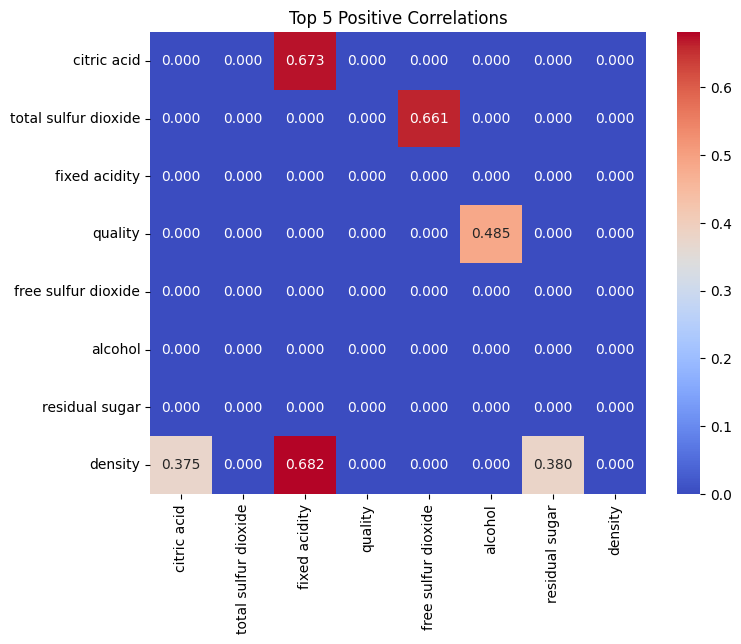

In [75]:


# Note: Ensure previous code cells have been executed...

# Create a dictionary to map variable pairs to correlation values
positive_correlations_dict = {(var1, var2): corr for var1, var2, corr in top_5_positive_correlations}

# Create an empty correlation matrix
positive_correlation_matrix = []

# Create a list of unique variables
variables = list(set(var for pair in top_5_positive_correlations for var in pair[:2]))

# Fill in the correlation matrix
for var1 in variables:
    row = [positive_correlations_dict.get((var1, var2), 0) for var2 in variables]
    positive_correlation_matrix.append(row)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(positive_correlation_matrix, annot=True, xticklabels=variables, yticklabels=variables, cmap='coolwarm', fmt=".3f")
plt.title("Top 5 Positive Correlations")
# plt.show()
plt.savefig('../output/question_3_4_top_5_positive_correlations.png', bbox_inches='tight')

Building on the previous code, the following code visualizes the top 5 negative correlations

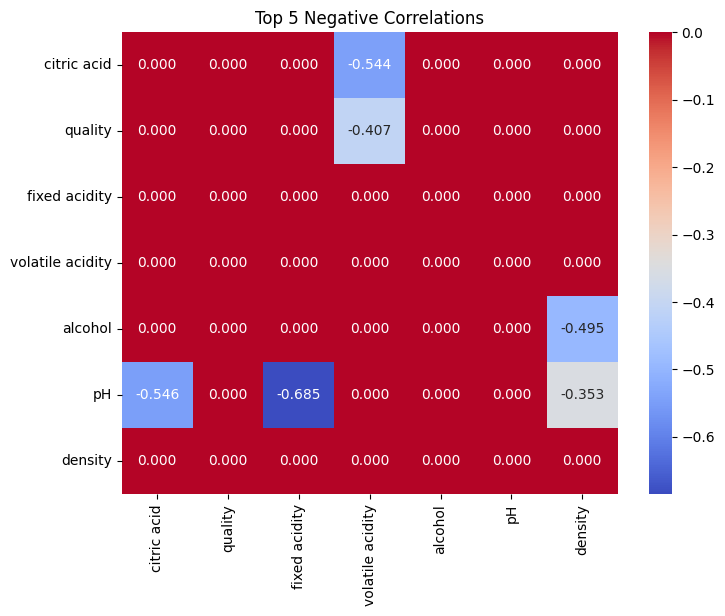

In [76]:
# Note: Ensure previous code cells have been executed...

# Create a dictionary to map variable pairs to correlation values
negative_correlations_dict = {(var1, var2): corr for var1, var2, corr in top_5_negative_correlations}

# Create an empty correlation matrix
negative_correlation_matrix = []

# Create a list of unique variables
variables = list(set(var for pair in top_5_negative_correlations for var in pair[:2]))

# Fill in the correlation matrix
for var1 in variables:
    row = [negative_correlations_dict.get((var1, var2), 0) for var2 in variables]
    negative_correlation_matrix.append(row)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(negative_correlation_matrix, annot=True, xticklabels=variables, yticklabels=variables, cmap='coolwarm', fmt=".3f")
plt.title("Top 5 Negative Correlations")
# plt.show()
plt.savefig('../output/question_3_4_top_5_negative_correlations.png', bbox_inches='tight')